# Import libraries


In [1]:
#import libraries which will use
import pandas as pd
import numpy as np
import tweepy 
import json
import requests
import os
import glob
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
from timeit import default_timer as timer
from PIL import Image
from io import BytesIO
from numpy import NaN
from timeit import default_timer as timer

In [2]:
#make folder to download the file in it
folder_name='we_rate_dogs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Gathering Data

In [3]:
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [4]:
#read csv file 
image_prediction=pd.read_csv('image-predictions.tsv',sep='	')
image_prediction_df=pd.DataFrame(image_prediction)

In [5]:
twitter_archive=pd.read_csv ('twitter-archive-enhanced-2.csv')
archive_df=pd.DataFrame(twitter_archive)



 get data from API account

In [6]:
#conect with twitter developer by API key and API secret
consumer_key = '******************'
consumer_secret = '******************'
access_token = '******************'
access_secret = '******************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt','w', encoding='utf-8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 355


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 331


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [8]:

df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df.info()
                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   user_count      2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [9]:
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [34]:
archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

merging data

In [35]:
#collect the data in one dataframe
df_combined =pd.merge(archive_df,api_df,on='tweet_id')
all_combined=pd.merge(df_combined,image_prediction,on='tweet_id')


In [36]:
all_combined.head()['doggo']

0    None
1    None
2    None
3    None
4    None
Name: doggo, dtype: object

# Assessing and Cleaning

 Cleaning data by define code and test

In [37]:
#make a copy to assess the data 
df_assess=all_combined.copy()

In [38]:
#converttimestamp to timestamp datatype

df_assess['timestamp'] = pd.to_datetime(df_assess['timestamp'])


In [39]:
df_assess['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2054   2015-11-16 00:24:50+00:00
2055   2015-11-16 00:04:52+00:00
2056   2015-11-15 23:21:54+00:00
2057   2015-11-15 23:05:30+00:00
2058   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2059, dtype: datetime64[ns, UTC]

In [40]:
#define structural issue
df_assess[['name','doggo','floofer','pupper','puppo']].head(7)

,name,doggo,floofer,pupper,puppo
0,Phineas,None,None,None,None
1,Tilly,None,None,None,None
2,Archie,None,None,None,None
3,Darla,None,None,None,None
4,Franklin,None,None,None,None
5,None,None,None,None,None
6,Jax,None,None,None,None


collect doggo,floofer,pupper,puppo in one column "Dirty data"

In [41]:
#code "replace none by space"
df_assess['doggo'].replace('None',' ',inplace=True)
df_assess['floofer'].replace('None',' ',inplace=True)
df_assess['pupper'].replace('None',' ',inplace=True)
df_assess['puppo'].replace('None',' ',inplace=True)

In [42]:
df_assess[['name','doggo','floofer','pupper','puppo']].head(7)

,name,doggo,floofer,pupper,puppo
0,Phineas,,,,
1,Tilly,,,,
2,Archie,,,,
3,Darla,,,,
4,Franklin,,,,
5,None,,,,
6,Jax,,,,


In [43]:
#make a new column called dog_name
df_assess['dog_name']=df_assess['doggo']+df_assess['floofer']+df_assess['pupper']+df_assess['puppo']

In [44]:
 df_assess.drop('doggo',axis=1,inplace=True)
df_assess.drop('floofer',axis=1,inplace=True)
df_assess.drop('pupper',axis=1,inplace=True) 
df_assess.drop('puppo',axis=1,inplace=True)


In [45]:

df_assess['dog_name'].value_counts()

                  1741
  pupper           210
doggo               65
   puppo            23
doggo pupper        11
 floofer             7
doggo  puppo         1
doggofloofer         1
Name: dog_name, dtype: int64

In [46]:
#test after cleaning
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2059 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2059 non-null   datetime64[ns, UTC]
 4   source                      2059 non-null   object             
 5   text                        2059 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2059 non-null   object             
 10  rating_numerator            2059 non-null   int64           

In [47]:
#define "treat with overrating "rating_numerator"
df_assess[['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2054,5,10
2055,6,10
2056,9,10
2057,7,10


In [48]:
df_assess['rating_numerator'].describe()

count    2059.000000
mean       12.263720
std        40.838002
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

coding "repair the false tweets"

In [49]:
df_rating=df_assess[df_assess.rating_numerator>=30]

In [50]:
df_rating['rating_numerator']

336       84
548       75
722      165
789     1776
911      204
988       50
1009      99
1034      80
1052      45
1118      60
1194      44
1366     143
1367     121
1498     144
1557      88
1781     420
Name: rating_numerator, dtype: int64

In [51]:
mean=df_assess.mean()['rating_numerator']
mean

12.263720252549781

In [52]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 336 to 1781
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    16 non-null     int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   16 non-null     datetime64[ns, UTC]
 4   source                      16 non-null     object             
 5   text                        16 non-null     object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               16 non-null     object             
 10  rating_numerator            16 non-null     int64           

In [53]:
#display the picture to be sure that is dogs tweet
df_rating['jpg_url']

336       https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
548       https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
722     https://pbs.twimg.com/ext_tw_video_thumb/75846...
789       https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
911       https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
988       https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg
1009      https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg
1034      https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg
1052      https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg
1118      https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg
1194      https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg
1366      https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg
1367      https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg
1498      https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg
1557      https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg
1781      https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

In [54]:
#drop false tweets
df_rating.drop(1781,axis=0,inplace=True) 
df_rating.drop(1366,axis=0,inplace=True)
df_rating.drop(722,axis=0,inplace=True)

C:\Users\shalan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
#drop mistakes twites that not includes dogs
df_assess.drop(1781,axis=0,inplace=True) 
df_assess.drop(1366,axis=0,inplace=True)
df_assess.drop(722,axis=0,inplace=True)

# code

In [56]:
#correct the rating with the number of dogs and replace the overrating with mean value to make sence
df_rating.rating_numerator=df_rating.rating_numerator.replace(84,48)
df_rating.rating_numerator=df_rating.rating_numerator.replace(75,mean)
df_rating.rating_numerator=df_rating.rating_numerator.replace(165,mean)
df_rating.rating_numerator=df_rating.rating_numerator.replace(204,24)
df_rating.rating_numerator=df_rating.rating_numerator.replace(1776,mean)
df_rating.rating_numerator=df_rating.rating_numerator.replace(50,24)
df_rating.rating_numerator=df_rating.rating_numerator.replace(99,99/8)
df_rating.rating_numerator=df_rating.rating_numerator.replace(80,99/8)
df_rating.rating_numerator=df_rating.rating_numerator.replace(45,45/5)
df_rating.rating_numerator=df_rating.rating_numerator.replace(60,60/4)
df_rating.rating_numerator=df_rating.rating_numerator.replace(44,44/4)
df_rating.rating_numerator=df_rating.rating_numerator.replace(121,121/11)
df_rating.rating_numerator=df_rating.rating_numerator.replace(144,144/11)
df_rating.rating_numerator=df_rating.rating_numerator.replace(88,88/8)




C:\Users\shalan\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\shalan\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# test

In [57]:
df_rating['rating_numerator']

336     48.000000
548     12.263720
789     12.263720
911     24.000000
988     24.000000
1009    12.375000
1034    12.375000
1052     9.000000
1118    15.000000
1194    11.000000
1367    11.000000
1498    13.090909
1557    11.000000
Name: rating_numerator, dtype: float64

In [58]:
df_assess.loc[336,'rating_numerator']=df_rating.loc [336,'rating_numerator']
df_assess.loc[548,'rating_numerator']=df_rating.loc [548,'rating_numerator']

df_assess.loc[789,'rating_numerator']=df_rating.loc [789,'rating_numerator']
df_assess.loc[911,'rating_numerator']=df_rating.loc [911,'rating_numerator']
df_assess.loc[988,'rating_numerator']=df_rating.loc [988,'rating_numerator']
df_assess.loc[1009,'rating_numerator']=df_rating.loc [1009,'rating_numerator']
df_assess.loc[1034,'rating_numerator']=df_rating.loc [1034,'rating_numerator']
df_assess.loc[1052,'rating_numerator']=df_rating.loc [1052,'rating_numerator']
df_assess.loc[1118,'rating_numerator']=df_rating.loc [1118,'rating_numerator']
df_assess.loc[1194,'rating_numerator']=df_rating.loc [1194,'rating_numerator']
df_assess.loc[1367,'rating_numerator']=df_rating.loc [1367,'rating_numerator']
df_assess.loc[1498,'rating_numerator']=df_rating.loc [1498,'rating_numerator']
df_assess.loc[1557,'rating_numerator']=df_rating.loc [1557,'rating_numerator']

In [59]:
df_assess['rating_numerator'].max()

48.0

In [60]:
df_assess['rating_denominator'].max()

170

# define

In [61]:
#get the rating denominator that not equal to 10
df_den=df_assess[df_assess['rating_denominator']!=10]

In [62]:
df_den['rating_denominator']

336      70
406       7
863      11
911     170
954      20
988      50
1009     90
1034     80
1052     50
1118     50
1194     40
1367    110
1392     11
1498    120
1557     80
2038      2
Name: rating_denominator, dtype: int64

In [63]:
#make sure that all tweets are for dogs
df_den['jpg_url']

336     https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg
406     https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
863     https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg
911     https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
954     https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg
988     https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg
1009    https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg
1034    https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg
1052    https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg
1118    https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg
1194    https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg
1367    https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg
1392    https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg
1498    https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg
1557    https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg
2038    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
Name: jpg_url, dtype: object

# code

In [64]:
#change the denominator to 10 
df_den['rating_denominator']=10

C:\Users\shalan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# test

In [65]:
df_den['rating_denominator']

336     10
406     10
863     10
911     10
954     10
988     10
1009    10
1034    10
1052    10
1118    10
1194    10
1367    10
1392    10
1498    10
1557    10
2038    10
Name: rating_denominator, dtype: int64

In [66]:
#change all rating denominator
df_assess.loc[336,'rating_denominator']=df_den.loc [336,'rating_denominator']
df_assess.loc[406,'rating_denominator']=df_den.loc [406,'rating_denominator']
df_assess.loc[863,'rating_denominator']=df_den.loc [863,'rating_denominator']
df_assess.loc[911,'rating_denominator']=df_den.loc [911,'rating_denominator']
df_assess.loc[954,'rating_denominator']=df_den.loc [954,'rating_denominator']
df_assess.loc[988,'rating_denominator']=df_den.loc [988,'rating_denominator']
df_assess.loc[1009,'rating_denominator']=df_den.loc [1009,'rating_denominator']
df_assess.loc[1034,'rating_denominator']=df_den.loc [1034,'rating_denominator']
df_assess.loc[1052,'rating_denominator']=df_den.loc [1052,'rating_denominator']
df_assess.loc[1118,'rating_denominator']=df_den.loc [1118,'rating_denominator']
df_assess.loc[1194,'rating_denominator']=df_den.loc [1194,'rating_denominator']
df_assess.loc[1367,'rating_denominator']=df_den.loc [1367,'rating_denominator']
df_assess.loc[1392,'rating_denominator']=df_den.loc [1392,'rating_denominator']
df_assess.loc[1498,'rating_denominator']=df_den.loc [1498,'rating_denominator']
df_assess.loc[1557,'rating_denominator']=df_den.loc [1557,'rating_denominator']
df_assess.loc[2038,'rating_denominator']=df_den.loc [2038,'rating_denominator']


In [67]:
#test all rating denominator
df_assess.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,img_num,p1_conf,p2_conf,p3_conf
count,2.056000e+03,2.200000e+01,2.200000e+01,7.200000e+01,7.200000e+01,2056.000000,2056.0,2056.000000,2056.000000,2.056000e+03,2056.000000,2056.000000,2.056000e+03,2.056000e+03
mean,7.378832e+17,6.984288e+17,4.196984e+09,7.621246e+17,1.093697e+16,10.636366,10.0,2481.272860,7736.879377,8.960796e+06,1.203794,0.594685,1.348171e-01,6.041587e-02
std,6.760538e+16,4.451659e+16,0.000000e+00,5.874100e+16,9.280326e+16,2.442376,0.0,4339.060665,11699.581748,4.635174e+01,0.563103,0.270976,1.007519e-01,5.101546e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,10.0,11.000000,0.000000,8.960785e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.762570e+17,6.724855e+17,4.196984e+09,7.106738e+17,4.196984e+09,10.000000,10.0,531.750000,1466.750000,8.960790e+06,1.000000,0.363889,5.389383e-02,1.623400e-02
50%,7.113353e+17,6.756022e+17,4.196984e+09,7.768988e+17,4.196984e+09,11.000000,10.0,1174.500000,3395.500000,8.960792e+06,1.000000,0.588030,1.186490e-01,4.945765e-02
75%,7.929651e+17,7.032024e+17,4.196984e+09,7.971477e+17,4.196984e+09,12.000000,10.0,2846.000000,9645.750000,8.960793e+06,1.000000,0.844247,1.960392e-01,9.226907e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,48.000000,10.0,74530.000000,150911.000000,8.961326e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
#get maximium of rating denominator
df_assess['rating_denominator'].max()

10

In [69]:
df_assess['rating_numerator'].sample(10)

506     11.0
1537     8.0
2011     9.0
1375    10.0
85      13.0
1764    10.0
246     12.0
1727    11.0
694     11.0
306     14.0
Name: rating_numerator, dtype: float64

# define


combine rating numerator and denominator in one column

In [70]:
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2058
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2056 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   2056 non-null   datetime64[ns, UTC]
 4   source                      2056 non-null   object             
 5   text                        2056 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2056 non-null   object             
 10  rating_numerator            2056 non-null   float64         

# code

In [71]:
#define the rate by divid the rating numerator by rating denominator
df_assess['rating']=df_assess['rating_numerator'] / df_assess['rating_denominator']

In [72]:
#remove rating_numerator and rating_denominator 
df_assess.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

# test

In [73]:
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2056 non-null   int64              
 1   in_reply_to_status_id       22 non-null     float64            
 2   in_reply_to_user_id         22 non-null     float64            
 3   timestamp                   2056 non-null   datetime64[ns, UTC]
 4   source                      2056 non-null   object             
 5   text                        2056 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2056 non-null   object             
 10  name                        2056 non-null   object          

# code

drop all unuseful columns

In [74]:
#drop unneeded columns
df_assess.drop(['in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)


# test

make sure that drop all unuseful columns

In [75]:
df_assess.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2058
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2056 non-null   int64              
 1   in_reply_to_status_id  22 non-null     float64            
 2   timestamp              2056 non-null   datetime64[ns, UTC]
 3   source                 2056 non-null   object             
 4   text                   2056 non-null   object             
 5   expanded_urls          2056 non-null   object             
 6   name                   2056 non-null   object             
 7   retweet_count          2056 non-null   int64              
 8   favorite_count         2056 non-null   int64              
 9   user_count             2056 non-null   int64              
 10  jpg_url                2056 non-null   object             
 11  img_num                2056 non-null   int64            

In [76]:
#drop in_reply_to_status_id column
df_assess.drop('in_reply_to_status_id',axis=1,inplace=True)

In [77]:
#test that all unuseful columns are deleted
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2056 non-null   int64              
 1   timestamp       2056 non-null   datetime64[ns, UTC]
 2   source          2056 non-null   object             
 3   text            2056 non-null   object             
 4   expanded_urls   2056 non-null   object             
 5   name            2056 non-null   object             
 6   retweet_count   2056 non-null   int64              
 7   favorite_count  2056 non-null   int64              
 8   user_count      2056 non-null   int64              
 9   jpg_url         2056 non-null   object             
 10  img_num         2056 non-null   int64              
 11  p1              2056 non-null   object             
 12  p1_conf         2056 non-null   float64            
 13  p1_dog          2056 non-null   b

In [78]:
df_assess['img_num'].value_counts()

1    1765
2     194
3      66
4      31
Name: img_num, dtype: int64

In [79]:
#test
sum(df_assess.rating.isnull())

0

In [80]:
df_assess[['rating']]

,rating
0,1.3
1,1.3
2,1.2
3,1.3
4,1.2
...,...
2054,0.5
2055,0.6
2056,0.9
2057,0.7


# test

rename columns to accordinf to it is meaning

In [81]:
#change columns name
df_assess[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...
2054,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2055,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2056,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2057,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# code

In [82]:
#change columns name to be defined
df_assess.rename({'p1':'most_likely','p1_conf':'first_confidence','p1_dog':'breed1','p2':'second_choise','p2_conf':'second_confidence','p2_dog':'breed2','p3':'third_choise','p3_conf':'third_confidence','p3_dog':'breed3'},axis=1,inplace=True)


# test

In [83]:
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2056 non-null   int64              
 1   timestamp          2056 non-null   datetime64[ns, UTC]
 2   source             2056 non-null   object             
 3   text               2056 non-null   object             
 4   expanded_urls      2056 non-null   object             
 5   name               2056 non-null   object             
 6   retweet_count      2056 non-null   int64              
 7   favorite_count     2056 non-null   int64              
 8   user_count         2056 non-null   int64              
 9   jpg_url            2056 non-null   object             
 10  img_num            2056 non-null   int64              
 11  most_likely        2056 non-null   object             
 12  first_confidence   2056 non-null   float64      

In [84]:
df_assess['dog_name'].sample(10)

1180             
1393      pupper 
1542             
142              
302      doggo   
1261             
1026             
813              
1742             
1741             
Name: dog_name, dtype: object

In [85]:
df_assess.loc[1226,'dog_name']

'    '

In [86]:
dogname=df_assess[df_assess.dog_name =='     ']
dogname['text'].head(10)

Series([], Name: text, dtype: object)

In [87]:
df_assess['name'].value_counts()

None        570
a            55
Charlie      10
Oliver       10
Penny        10
           ... 
Lance         1
Hermione      1
Walker        1
Tommy         1
Jamesy        1
Name: name, Length: 934, dtype: int64

In [107]:
df_assess.describe()

,tweet_id,retweet_count,favorite_count,user_count,img_num,first_confidence,second_confidence,third_confidence,rating
count,2.056000e+03,2056.000000,2056.000000,2.056000e+03,2056.000000,2056.000000,2.056000e+03,2.056000e+03,2056.000000
mean,7.378832e+17,2481.272860,7736.879377,8.960796e+06,1.203794,0.594685,1.348171e-01,6.041587e-02,1.063637
std,6.760538e+16,4339.060665,11699.581748,4.635174e+01,0.563103,0.270976,1.007519e-01,5.101546e-02,0.244238
min,6.660209e+17,11.000000,0.000000,8.960785e+06,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,6.762570e+17,531.750000,1466.750000,8.960790e+06,1.000000,0.363889,5.389383e-02,1.623400e-02,1.000000
50%,7.113353e+17,1174.500000,3395.500000,8.960792e+06,1.000000,0.588030,1.186490e-01,4.945765e-02,1.100000
75%,7.929651e+17,2846.000000,9645.750000,8.960793e+06,1.000000,0.844247,1.960392e-01,9.226907e-02,1.200000
max,8.924206e+17,74530.000000,150911.000000,8.961326e+06,4.000000,1.000000,4.880140e-01,2.734190e-01,4.800000


there are 571 unkown name with 'None' and 55 name with letter 'a' we can extract the name from text column 

In [88]:
df_assess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2056 non-null   int64              
 1   timestamp          2056 non-null   datetime64[ns, UTC]
 2   source             2056 non-null   object             
 3   text               2056 non-null   object             
 4   expanded_urls      2056 non-null   object             
 5   name               2056 non-null   object             
 6   retweet_count      2056 non-null   int64              
 7   favorite_count     2056 non-null   int64              
 8   user_count         2056 non-null   int64              
 9   jpg_url            2056 non-null   object             
 10  img_num            2056 non-null   int64              
 11  most_likely        2056 non-null   object             
 12  first_confidence   2056 non-null   float64      

# storing

In [89]:
#save dataframe 
df_assess.to_csv('we_rate_dogs.csv',index=False)


# Analyze & Visualize Report

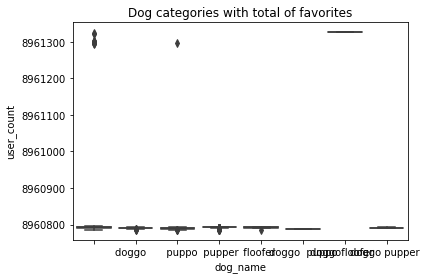

In [90]:

sns.boxplot(x="dog_name", y="user_count",data=df_assess).set_title('Dog categories with total of favorites');
plt.rcParams['figure.figsize']=(12,13)
plt.savefig("user count")

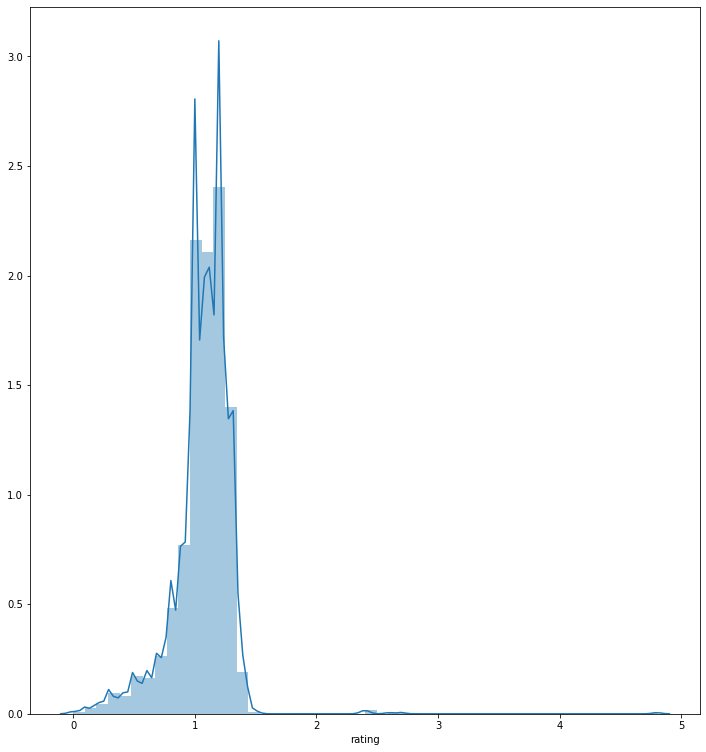

In [91]:
sns.distplot(df_assess.rating)
plt.savefig("rating")

after we correct the rating most of 

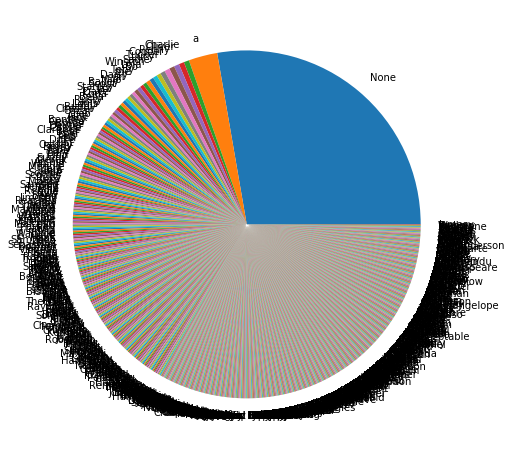

In [92]:
df_assess['name'].value_counts().plot(kind='pie',figsize=(8,8))
plt.savefig("name pie")

we get pie chartto know the % of dog names and we obtain that most of them is None

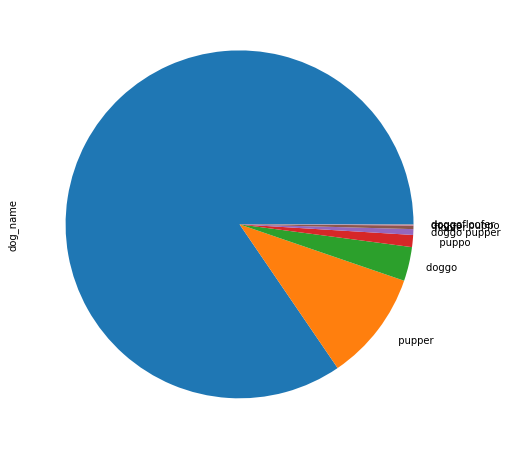

In [93]:
df_assess['dog_name'].value_counts().plot(kind='pie',figsize=(8,8))
plt.savefig("dog name pie")

as we see most of dogs with no name

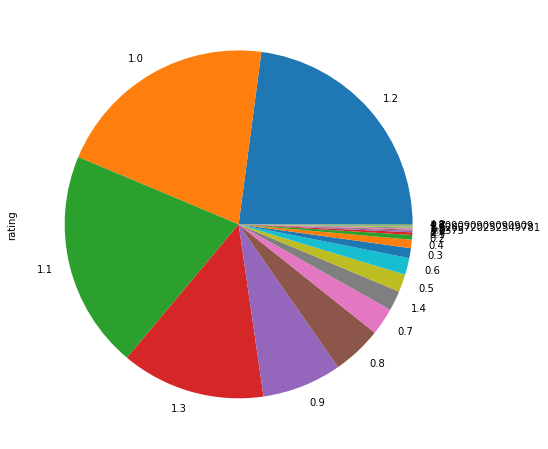

In [94]:
df_assess['rating'].value_counts().plot(kind='pie',figsize=(8,8))
plt.savefig("rating pie")

we obtain that most of people give rating more than one to their dogs

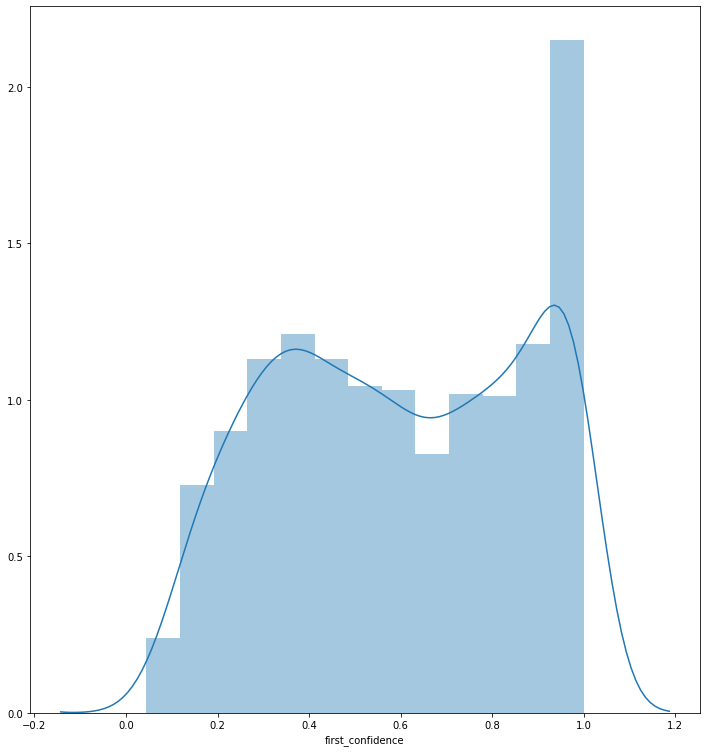

In [95]:
sns.distplot(df_assess.first_confidence)
plt.savefig("first confidence")

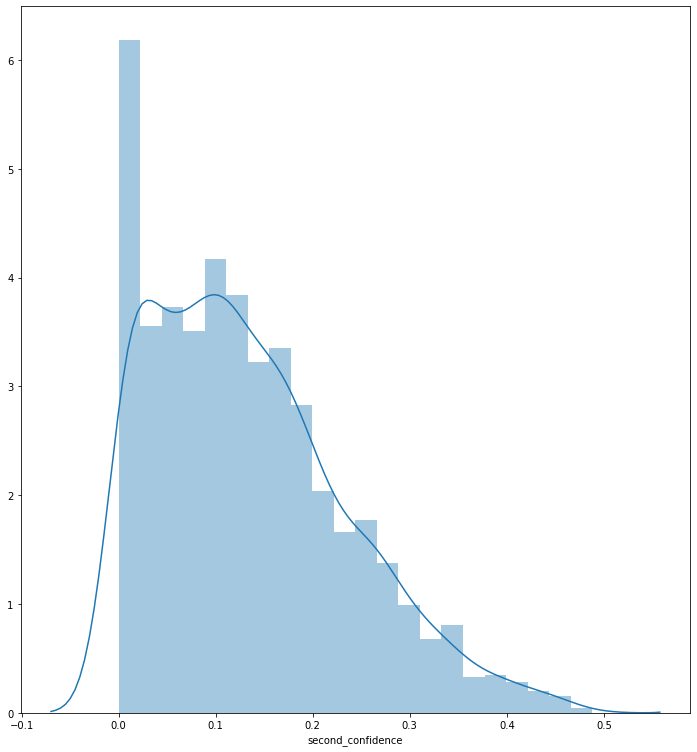

In [96]:
sns.distplot(df_assess.second_confidence)
plt.savefig("second confidence")

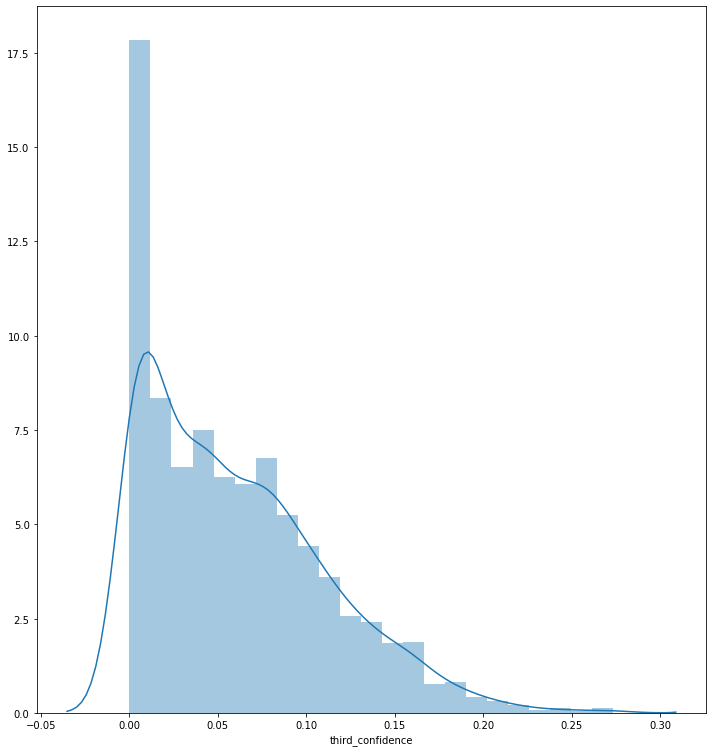

In [97]:
sns.distplot(df_assess.third_confidence)
plt.savefig("third confidence")